In [1]:
import numpy as np
import pandas as pd
import os

# Load the data from the .npy file
data_path = 'data/ai_ready'
file_name = '1_ready.npy'
full_path = os.path.join(data_path, file_name)
east_component_data = np.load(full_path)

# Define a window size and overlap (in number of samples)
freq = 25 #25 samples per second (For Sitkin Data)
window_size = 15 * 60 * 25  #15 minute long window
overlap = 500

# Sliding window function
def sliding_window(data, window_size, overlap):
    step = window_size - overlap
    windows = [data[i:i+window_size] for i in range(0, len(data)-window_size+1, step)]
    return windows

# Apply the sliding window function to the data
windows = sliding_window(east_component_data, window_size, overlap)

# Feature extraction: calculate mean, std, etc. for each window
features = []
for window in windows:
    mean = np.mean(window)
    std = np.std(window)
    max_val = np.max(window)
    min_val = np.min(window)
    features.append([mean, std, max_val, min_val])

# Convert the features list to a NumPy array
features = np.array(features)

# Print the shape of the features array to verify
print('Features shape:', features.shape, '\n')

# Print the first few rows of the features array
print('First 5 rows of features:')
print(features[:5], '\n')

# Print summary statistics for each feature
feature_names = ['Mean', 'Std', 'Max', 'Min']
for i, name in enumerate(feature_names):
    print(f'{name} - Mean: {np.mean(features[:, i]):.2f}, Std: {np.std(features[:, i]):.2f}, '
          f'Min: {np.min(features[:, i]):.2f}, Max: {np.max(features[:, i]):.2f}')

# Print the data types of the features
print('Data types of features:', features.dtype)

# Optionally, save the features to a new .npy file
output_file = os.path.join(data_path, '1_ready_features.npy')
#os.makedirs(data_path, exist_ok=True)
np.save(output_file, features)

Features shape: (98, 4) 

First 5 rows of features:
[[ 1.02876323e+01  7.67438691e+02  2.92081630e+03 -2.65583314e+03]
 [ 2.01107103e+00  7.94315758e+02  2.94481316e+03 -3.52310441e+03]
 [ 2.46257613e+01  7.21556154e+02  3.15327550e+03 -2.68478806e+03]
 [ 1.25693991e+01  7.41027306e+02  2.83721236e+03 -2.48450586e+03]
 [ 2.69797553e+01  7.59949501e+02  3.05015291e+03 -3.10917569e+03]] 

Mean - Mean: -0.99, Std: 28.26, Min: -60.00, Max: 43.67
Std - Mean: 705.57, Std: 109.98, Min: 472.28, Max: 879.07
Max - Mean: 2988.41, Std: 532.99, Min: 2021.81, Max: 5361.26
Min - Mean: -2987.16, Std: 578.50, Min: -5160.68, Max: -1973.58
Data types of features: float64


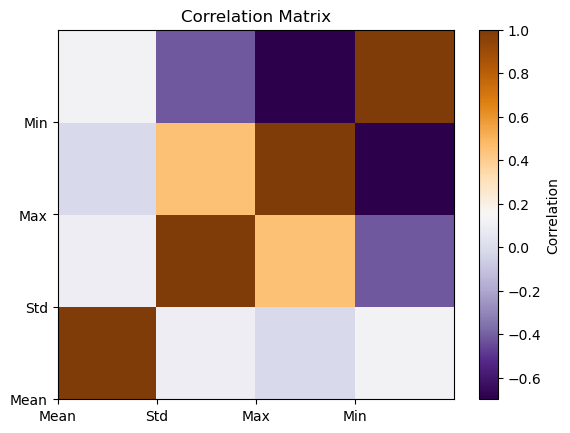

In [8]:
#put features into labeled dataframe
stats_df = pd.DataFrame(features, columns=['Mean', 'Std', 'Max', 'Min'])

#calculation correlation matrix
corr_matrix = stats_df.corr()

#display correlation matrix
plt.title('Correlation Matrix')
plt.pcolor(corr_matrix, cmap='PuOr_r')
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns);

In [ ]:
#The standard reviation and the mean, and the minimum and the mean seem to be the least correlated statistics.

Explained variance ratio: [0.5144579  0.26267291]


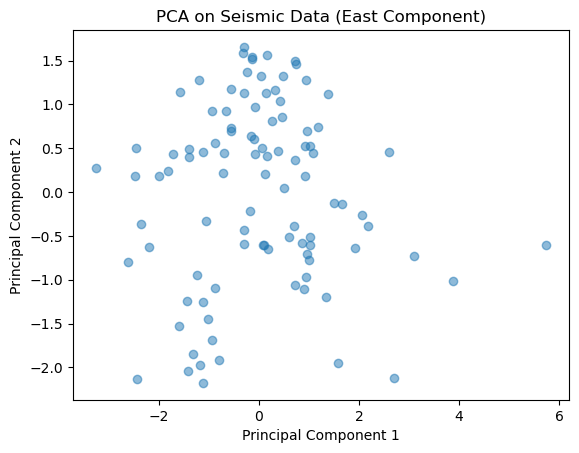

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
features_pca = pca.fit_transform(features_scaled)

print(f'Explained variance ratio: {pca.explained_variance_ratio_}')

# Visualize the results

plt.scatter(features_pca[:, 0], features_pca[:, 1], alpha = 0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Seismic Data (East Component)')
plt.show()

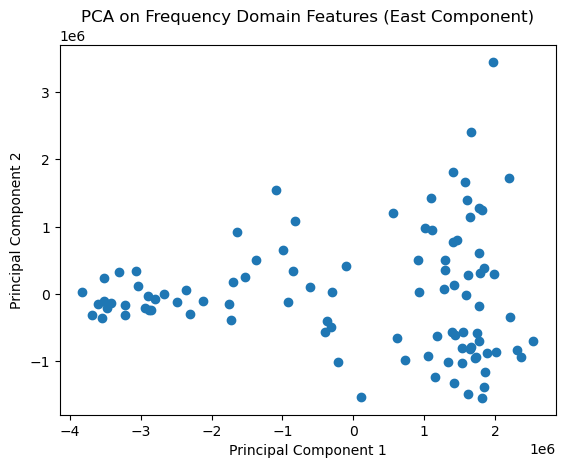

In [5]:
from scipy.fft import fft

# Apply Fourier Transform on each window
fft_features = [np.abs(fft(window))[:len(window)//2] for window in windows]

# Apply PCA on frequency features
fft_features = np.array(fft_features)
pca = PCA(n_components=2)
fft_pca = pca.fit_transform(fft_features)

# Plot the results
plt.scatter(fft_pca[:, 0], fft_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Frequency Domain Features (East Component)')
plt.show()

In [ ]:
#PCA seems to show some ability to group frequency features, but has a very hard time correlating seismic data.